## About partial

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
from functools import partial

- https://rfriend.tistory.com/526

### 기존 함수를 재활용해서 매개변수 값을 고정하여 새 함수를 만든다.

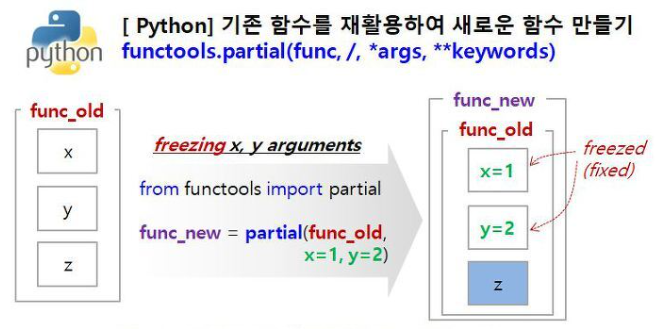

파이썬에는 문자열을 정수로 변환해주는 함수가 있음
- int(x, base = 10)

In [3]:
print(int('101', base = 2))
print(int('101', base = 5))

5
26


base = 2를 고정한 새로운 함수를 만들어보자.

In [4]:
basetwo = partial(int, base = 2)
basetwo('101')

5

- https://www.pythontutorial.net/python-basics/python-partial-functions/

다음과 같이 아규먼트가 2개 있는 함수를 살펴보자.

In [5]:
def multiply(a, b):
    return a*b

그리고 다음과 같은 함수도 정의했다고 가정하자.

In [6]:
def double(a):
    return multiply(a, 2)

- double 함수는 multiply 함수의 두번째 인자를 고정해서 만들어 졌다.  
- 다른 말로 double 함수는 multiply 함수의 복잡도를 줄였다.
- 파이썬에서는 douple 함수를 partial function이라고 한다.
- 파이썬에는 functools.partial로 쉽게 정의 할 수 있다.

In [7]:
from functools import partial

def multiply(a, b):
    return a*b

double = partial(multiply, b = 2)

result = double(10)

In [8]:
result

20

- https://hamait.tistory.com/823

그럼 partial을 왜 쓰나?

다음 지수 함수를 생각해보자.

In [9]:
def power(base, exponent):
    return base ** exponent

스퀘어, 큐브 함수를 다음과 같이 만들 수 있을 것이다.

In [10]:
def square(base):
    return power(base, 2)

def cube(base):
    return power(base, 3)

만약 power() 함수의 변형이 15개 20개라면 어떻게 할까?
함수를 만드는데 단순 반복 잡업이 증가한다.  
이 때 partial을 사용

In [11]:
from functools import partial

square = partial(power, exponent=2)
cube = partial(power, exponent=3)

In [12]:
def test_partials():
    assert square(2) == 4
    assert cube(2) == 8

In [13]:
test_partials()

partial 함수의 속성으로는 keywoards, func가 있다.(중요)

In [14]:
def test_partial_docs():
    assert square.keywords == {"exponent": 2}
    assert square.func == power

    assert cube.keywords == {"exponent": 3}
    assert cube.func == power

In [15]:
test_partial_docs()

- https://wikidocs.net/109304

functools.partial()은 하나 이상의 인수가 이미 채워진 새 버전의 함수를 만들 때 사용하는 함수이다.

다음은 인수의 합과 곱을 choice 값에 따라 선택적으로 리턴하는 함수이다.

In [16]:
def add_mul(choice, *args):
    if choice == "add":
        result = 0
        for i in args:
            result = result + i
    elif choice == "mul":
        result = 1
        for i in args:
            result = result * i
    return result

그렇다면 add_mul() 함수를 활용하여 다음과 같이 동작하는 add(), mul() 함수를 만들려면 어떻게 해야 할까?

일반적인 방법

In [17]:
def add_mul(choice, *args):
    if choice == "add":
        result = 0
        for i in args:
            result = result + i
    elif choice == "mul":
        result = 1
        for i in args:
            result = result * i
    return result

def add(*args):
    return add_mul('add', *args)

def mul(*args):
    return add_mul('mul', *args)    

print(add(1,2,3,4,5))  # 15 출력
print(mul(1,2,3,4,5))  # 120 출력

15
120


partial을 사용하면 더 간결하게 코드 작성 가능

In [18]:
from functools import partial

def add_mul(choice, *args):
    if choice == "add":
        result = 0
        for i in args:
            result = result + i
    elif choice == "mul":
        result = 1
        for i in args:
            result = result * i
    return result

add = partial(add_mul, 'add')
mul = partial(add_mul, 'mul')

print(add(1,2,3,4,5))  # 15 출력
print(mul(1,2,3,4,5))  # 120 출력

15
120


- https://towardsdatascience.com/simplify-your-functions-with-functools-partial-and-singledispatch-b7071f7543bb

In [19]:
from sklearn.datasets import load_wine
import pandas as pd 

X, y = load_wine(as_frame=True, return_X_y=True)
df = X.merge(y, left_index=True, right_index=True)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


만약에 특정 th 기준 이상의 rows 수를 확인하고자 한다면 다음 함수를 구현할 수가 있다.

In [20]:
def get_count_above_th_per_col_df(
    threshold: str,
    column: str,
    df: pd.DataFrame
):
    return (df[column] > threshold).sum()

In [21]:
get_count_above_th_per_col_df(98, 'magnesium', df)

82

In [22]:
get_count_above_th_per_col_df(13, 'alcohol', df)

92

- 이런 식으로 함수를 만드는 것이 잘못된 것은 아닙니다. 그러나 임계값과 열에 대해 서로 다른 값을 실험하려는 경우 df가 중복됩니다.

인수가 고정된 상태에서 원래 함수와 유사한 다른 함수를 만들 수 있는 방법이 있을까요? 예, functools.partial 을 사용하면 가능합니다.

In [23]:
from functools import partial

get_count_above_th_per_col = \
    partial(
        get_count_above_th_per_col_df,
        df = df
        )

In [24]:
get_count_above_th_per_col(13, 'alcohol')

92